In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-09 15:57:24--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1,41M  1,57MB/s    in 0,9s    

2023-10-09 15:57:25 (1,57 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [88]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('data.csv')

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [90]:
df = df[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']]

In [91]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [92]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [93]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [94]:
df.isna().any()

make                 False
model                False
year                 False
engine_hp             True
engine_cylinders      True
transmission_type    False
vehicle_style        False
highway_mpg          False
city_mpg             False
msrp                 False
dtype: bool

In [95]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [96]:
df = df.fillna(0)

In [97]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [98]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [99]:
mean_price = df['msrp'].mean()
mean_price

40594.737032063116

In [100]:
df['above_average'] = np.where(df['msrp'] > mean_price, 1, 0)

In [101]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [102]:
df['above_average'].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = df[df.columns[:-1]]

In [105]:
X

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [106]:
y = df['above_average']

In [107]:
y

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [109]:
print(len(X_train))
print(len(X_test))

7148
4766


In [110]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=1, test_size=0.5)

In [111]:
print(len(X_val))
print(len(X_test))

2383
2383


In [112]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Replace with your model of choice


In [113]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [114]:
print(roc_auc_score(y_train,X_train['engine_hp']))
print(roc_auc_score(y_train,X_train['engine_cylinders']))
print(roc_auc_score(y_train,X_train['highway_mpg']))
print(roc_auc_score(y_train,X_train['city_mpg']))

0.9159001518508375
0.768274900593613
0.36663146003217206
0.3276732543772199


In [115]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
3840,Hyundai,Elantra GT,2016,173.0,4.0,MANUAL,4dr Hatchback,33,24,18800
5780,Mitsubishi,i-MiEV,2017,66.0,0.0,DIRECT_DRIVE,4dr Hatchback,102,121,22995
8637,Audi,RS 5,2014,450.0,8.0,AUTOMATED_MANUAL,Convertible,22,16,77900
5620,Volkswagen,GTI,2012,200.0,4.0,AUTOMATED_MANUAL,2dr Hatchback,33,24,27375
122,Mazda,2,2014,100.0,4.0,MANUAL,4dr Hatchback,35,29,16210
...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,6.0,AUTOMATIC,4dr SUV,26,18,53500
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,47975
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,2000
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,22220


In [116]:
num_df = X_train[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]

In [117]:
num_df

,engine_hp,engine_cylinders,highway_mpg,city_mpg
3840,173.0,4.0,33,24
5780,66.0,0.0,102,121
8637,450.0,8.0,22,16
5620,200.0,4.0,33,24
122,100.0,4.0,35,29
...,...,...,...,...
7813,272.0,6.0,26,18
10955,381.0,8.0,17,13
905,150.0,4.0,26,18
5192,164.0,4.0,33,22


In [118]:
y_train

3840     0
5780     0
8637     1
5620     0
122      0
        ..
7813     1
10955    1
905      0
5192     0
235      0
Name: above_average, Length: 7148, dtype: int64

In [119]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [120]:
X_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
3840,Hyundai,Elantra GT,2016,173.0,4.0,MANUAL,4dr Hatchback,33,24,18800
5780,Mitsubishi,i-MiEV,2017,66.0,0.0,DIRECT_DRIVE,4dr Hatchback,102,121,22995
8637,Audi,RS 5,2014,450.0,8.0,AUTOMATED_MANUAL,Convertible,22,16,77900
5620,Volkswagen,GTI,2012,200.0,4.0,AUTOMATED_MANUAL,2dr Hatchback,33,24,27375
122,Mazda,2,2014,100.0,4.0,MANUAL,4dr Hatchback,35,29,16210
...,...,...,...,...,...,...,...,...,...,...
7813,Audi,Q5,2016,272.0,6.0,AUTOMATIC,4dr SUV,26,18,53500
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,47975
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,2000
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,22220


In [127]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000, solver='liblinear')
    model.fit(X_train, y_train)
    
    return dv, model

In [128]:
dv, model = train(X_train, y_train, C=0.001)

In [129]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [130]:
y_pred = predict(X_val, dv, model)


In [133]:
y_pred

array([2.51754642e-23, 1.41226371e-11, 6.78850362e-68, ...,
       6.48017138e-09, 2.75214828e-40, 1.00000000e+00])

In [135]:
len(y_val)

2383

In [132]:
y_val

4429     0
11454    0
6799     0
1536     1
8701     0
        ..
3832     0
10006    0
1967     0
4872     0
1555     1
Name: above_average, Length: 2383, dtype: int64

In [136]:
auc = round(roc_auc_score(y_val, y_pred),3)
auc

1.0

In [141]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [142]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [143]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [144]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1737,    0],
       [   0,  646]])

In [145]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.73, 0.  ],
       [0.  , 0.27]])

In [146]:
p = tp / (tp + fp)
p

1.0

In [147]:
r = tp / (tp + fn)
r

1.0

In [156]:
scores = []

thresholds = np.arange(0, 1.1, 0.1)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))


In [158]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

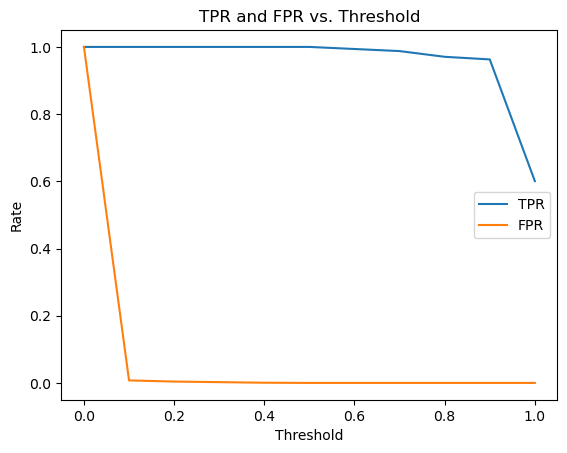

In [160]:
import matplotlib.pyplot as plt

# Assuming df_scores is a DataFrame with columns 'threshold', 'tpr', and 'fpr'

# Convert DataFrame columns to NumPy arrays or lists
thresholds = df_scores['threshold'].to_numpy()  # or df_scores['threshold'].tolist()
tpr_values = df_scores['tpr'].to_numpy()  # or df_scores['tpr'].tolist()
fpr_values = df_scores['fpr'].to_numpy()  # or df_scores['fpr'].tolist()

# Plot the data
plt.plot(thresholds, tpr_values, label='TPR')
plt.plot(thresholds, fpr_values, label='FPR')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold')
plt.show()


In [161]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,646,1737,0,0,1.000000,1.000000
1,0.1,646,13,0,1724,1.000000,0.007484
2,0.2,646,7,0,1730,1.000000,0.004030
3,0.3,646,4,0,1733,1.000000,0.002303
4,0.4,646,1,0,1736,1.000000,0.000576
5,0.5,646,0,0,1737,1.000000,0.000000
6,0.6,642,0,4,1737,0.993808,0.000000
7,0.7,638,0,8,1737,0.987616,0.000000
8,0.8,627,0,19,1737,0.970588,0.000000
9,0.9,622,0,24,1737,0.962848,0.000000


In [173]:
f1_scores = []

thresholds = np.arange(0, 1.1, 0.1)

for ind, i in df_scores.iterrows():
    tp = i['tp']
    fp = i['fp']
    fn = i['fn']
    tn = i['tn']

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    print(i['threshold'])
    print(2*p*r/(p+r))
    print()

    

0.0
0.4265434136678772

0.1
0.9900383141762452

0.2
0.9946112394149346

0.30000000000000004
0.9969135802469136

0.4
0.9992266047950503

0.5
1.0

0.6000000000000001
0.9968944099378882

0.7000000000000001
0.9937694704049844

0.8
0.9850746268656716

0.9
0.9810725552050473

1.0
0.7504835589941974



In [174]:
from sklearn.model_selection import KFold

In [175]:
!pip3 install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [176]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))